<a href="https://colab.research.google.com/github/rohan-singh987/imageDetection-Loacalization/blob/rohan/imageDetection_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset from github

In [1]:
!git clone https://github.com/ayulockin/synthetic_datasets
%cd synthetic_datasets/MNIST/
%mkdir images


!unzip -q MNIST_Converted_Training.zip -d images/
!unzip -q MNIST_Converted_Testing.zip -d images/

Cloning into 'synthetic_datasets'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 42 (delta 1), reused 1 (delta 1), pack-reused 39
Unpacking objects: 100% (42/42), 42.06 MiB | 5.84 MiB/s, done.
/content/synthetic_datasets/MNIST


In [2]:
%cd ../..

/content


# Reading Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [4]:
import tensorflow as tf

In [5]:
S = 'synthetic_datasets'
M = 'MNIST'
I = 'images'


data = pd.read_csv(path.join(S,M,'training_data.csv'), header = None)
columns = ['path', 'class_index', 'xmin', 'ymin', 'xmax', 'ymax']
data.columns = columns

testData = pd.read_csv(path.join(S,M,'test_data.csv'), header=None)
testData.columns = columns

t = 'MNIST_Converted_Training'
data['path'] = data['path'].apply(lambda x: path.join(S,M,I,t,x))

t = 'MNIST_Converted_Testing'
testData['path'] = testData['path'].apply(lambda x: path.join(S,M,I,t,x))


In [6]:
data

,path,class_index,xmin,ymin,xmax,ymax
0,synthetic_datasets/MNIST/images/MNIST_Converte...,4,0.49,0.15,0.77,0.43
1,synthetic_datasets/MNIST/images/MNIST_Converte...,1,0.64,0.26,0.92,0.54
2,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.42,0.39,0.70,0.67
3,synthetic_datasets/MNIST/images/MNIST_Converte...,7,0.58,0.10,0.86,0.38
4,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.21,0.23,0.49,0.51
...,...,...,...,...,...,...
59995,synthetic_datasets/MNIST/images/MNIST_Converte...,7,0.32,0.58,0.60,0.86
59996,synthetic_datasets/MNIST/images/MNIST_Converte...,1,0.48,0.33,0.76,0.61
59997,synthetic_datasets/MNIST/images/MNIST_Converte...,6,0.22,0.06,0.50,0.34
59998,synthetic_datasets/MNIST/images/MNIST_Converte...,1,0.39,0.23,0.67,0.51


In [7]:
testData

,path,class_index,xmin,ymin,xmax,ymax
0,synthetic_datasets/MNIST/images/MNIST_Converte...,2,0.20,0.45,0.48,0.73
1,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.02,0.03,0.30,0.31
2,synthetic_datasets/MNIST/images/MNIST_Converte...,4,0.55,0.39,0.83,0.67
3,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.38,0.42,0.66,0.70
4,synthetic_datasets/MNIST/images/MNIST_Converte...,7,0.69,0.17,0.97,0.45
...,...,...,...,...,...,...
9995,synthetic_datasets/MNIST/images/MNIST_Converte...,5,0.46,0.34,0.74,0.62
9996,synthetic_datasets/MNIST/images/MNIST_Converte...,9,0.54,0.25,0.82,0.53
9997,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.50,0.32,0.78,0.60
9998,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.62,0.61,0.90,0.89


In [8]:
data_row1 = data.iloc[0].to_numpy().tolist()

data_row1

['synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png',
 4,
 0.49,
 0.15,
 0.77,
 0.43]

## Visualizing Data

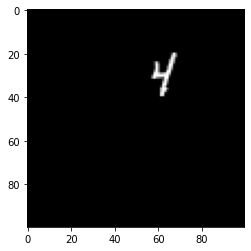

In [9]:
def visualizeImage(imagepath):
  image = tf.io.read_file(imagepath)
  image = tf.image.decode_png(image, channels=1)

# Transfer Learning model always expect 3Channel RGB image
  image = tf.image.grayscale_to_rgb(image)
  image = image.numpy().astype(np.uint8)
  return image

plt.imshow(visualizeImage(data_row1[0]))

## Adding Pathches around image

49 15 77 43
width: 28, height: 28


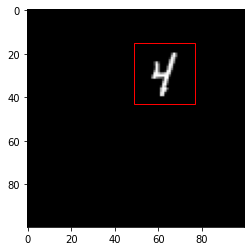

In [10]:
import matplotlib.patches as patches
from PIL import Image

imagee = visualizeImage(data_row1[0])
fig, ax = plt.subplots()
ax.imshow(imagee)

x1, y1, x2, y2 = [int(value*100) for value in data_row1[2:]]
print(x1, y1, x2, y2)

width = x2-x1
height = y2-y1

print(f'width: {width}, height: {height}')
patchBox = patches.Rectangle((x1,y1), width, height, linewidth=1, edgecolor='r', facecolor='none' )

ax.add_patch(patchBox)

plt.show()

## Check and Fix Balancing Issues

In [11]:
len(data)

60000

In [12]:
len(testData)

10000

In [13]:
data['class_index'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: class_index, dtype: int64

### Split Test data into TestData and ValidationData

In [14]:
valData, testData = testData[:5000], testData[5000:]

In [15]:
len(valData), len(testData)

(5000, 5000)

In [16]:
box_column = ['xmin', 'ymin', 'xmax', 'ymax']

boxesTrain = data[box_column].to_numpy()
boxesVal = valData[box_column].to_numpy()
boxesTest = testData[box_column].to_numpy()

classTrain = data['class_index'].to_numpy()
classVal = valData['class_index'].to_numpy()
classTest = testData['class_index'].to_numpy()

## Creating Tensorflow DataSet

In [17]:
@tf.function
def load_image(image_path, label_dict):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.grayscale_to_rgb(image)
  return (image, label_dict)

In [18]:
trainDataset = tf.data.Dataset.from_tensor_slices((data['path'].tolist(),
                                            {'box': boxesTrain,
                                             'class': classTrain}
                                            ))
trainDataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [19]:
valDataset = tf.data.Dataset.from_tensor_slices((valData['path'].tolist(),
                                            {'box': boxesVal,
                                             'class': classVal}
                                            ))
valDataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [20]:
testDataset = tf.data.Dataset.from_tensor_slices((testData['path'].tolist(),
                                            {'box': boxesTest,
                                             'class': classTest}
                                            ))
testDataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [21]:
iter = trainDataset.as_numpy_iterator()

(b'synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png',
 {'box': array([0.49, 0.15, 0.77, 0.43]), 'class': 4})

In [30]:
iterator = iter(trainDataset)

In [31]:
load_image(*next(iterator))[0].numpy().shape

(100, 100, 3)

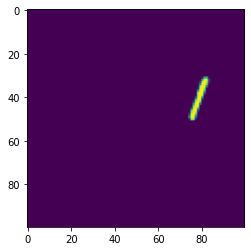

In [32]:
plt.imshow(load_image(*next(iterator))[0].numpy()[:, :, 0])

In [33]:
from tensorflow._api.v2.data import AUTOTUNE

SHUFFLE = len(trainDataset)
BATCH = 4

trainDataset = trainDataset.shuffle(SHUFFLE).map(load_image).batch(BATCH).prefetch(AUTOTUNE)
valDataset = valDataset.map(load_image).batch(BATCH).prefetch(AUTOTUNE)
testDataset = testDataset.map(load_image).batch(BATCH).prefetch(AUTOTUNE)

## Building Model

In [34]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S

model = EfficientNetV2S(weights='imagenet', 
                         include_top=False,
                         input_shape=(100, 100, 3))

82420632/82420632 [==============================] - 1s 0us/step


In [35]:
model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 50, 50, 24)   648         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 50, 50, 24)   96          ['stem_conv[0][0]'